In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [6]:
data= pd.read_csv("insurance.csv")

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
data=data[['age',  'bmi',  'charges']]

In [19]:
df = pd.DataFrame(data)

In [21]:
X = df[['age', 'bmi']]
y = df['charges']

In [ ]:
# Add a constant term for the OLS regression
X = sm.add_constant(X)

In [23]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

In [24]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           7.39e-37
Time:                        22:24:59   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.0

In [25]:
# Residuals from the model
residuals = model.resid
fitted_values = model.fittedvalues

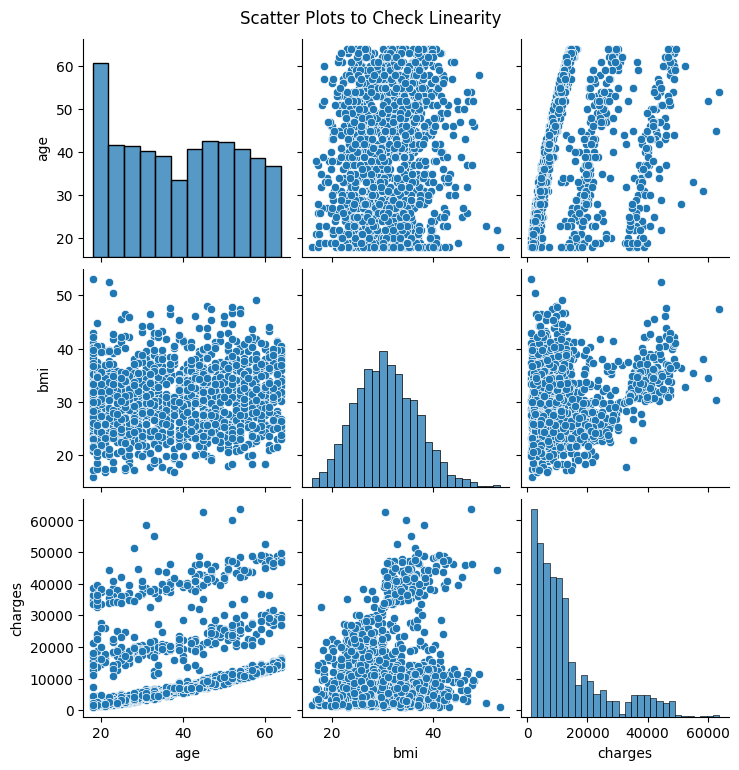


Variance Inflation Factor (VIF):
  Variable        VIF
0    const  31.389518
1      age   1.012085
2      bmi   1.012085


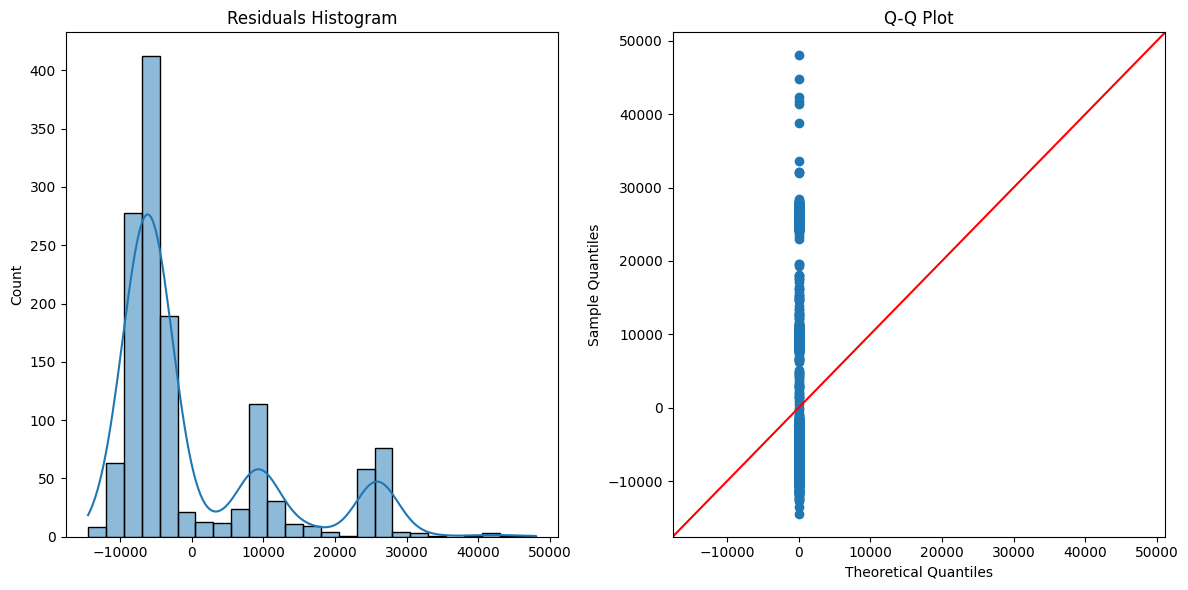

In [28]:
# ----------- Step 1: Gaussian-Markov Assumptions -----------

# 1. Linearity and No Multicollinearity
# Pairplot to visualize relationships
sns.pairplot(df)
plt.suptitle("Scatter Plots to Check Linearity", y=1.02)
plt.show()

# Variance Inflation Factor (VIF) for multicollinearity
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# 2. Normality of residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of residuals
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title("Residuals Histogram")

# Q-Q plot
sm.qqplot(residuals, line='45', ax=ax[1])
ax[1].set_title("Q-Q Plot")

plt.tight_layout()
plt.show()



Breusch-Pagan Test Statistic: 135.1189281845989
Breusch-Pagan Test p-value: 4.563494635823949e-30


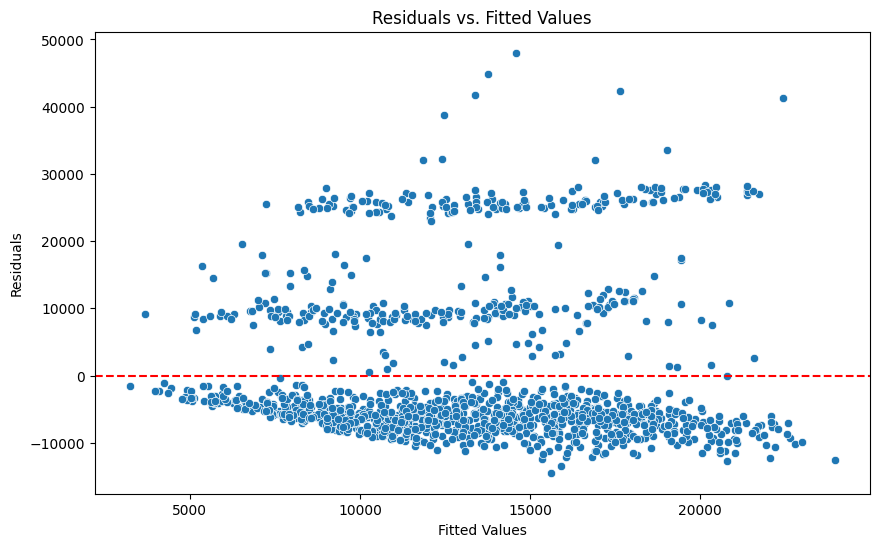

In [29]:
# ----------- Step 2: Heteroskedasticity -----------

# Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, model.model.exog)
bp_stat, bp_pval, _, _ = bp_test
print(f"\nBreusch-Pagan Test Statistic: {bp_stat}")
print(f"Breusch-Pagan Test p-value: {bp_pval}")

# Scatterplot of residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [30]:
# ----------- Step 3: Endogeneity -----------

# Durbin-Watson Test for autocorrelation
dw_stat = durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_stat}")


Durbin-Watson Statistic: 2.009830755846484


In [31]:
# ----------- Interpretation -----------

print("\n### Interpretation ###")
if bp_pval < 0.05:
    print("Heteroskedasticity detected (Breusch-Pagan test failed).")
else:
    print("No heteroskedasticity detected (Breusch-Pagan test passed).")

if dw_stat < 1.5 or dw_stat > 2.5:
    print("Endogeneity detected (Durbin-Watson statistic suggests autocorrelation).")
else:
    print("No endogeneity detected (Durbin-Watson statistic is acceptable).")

if vif_data['VIF'].max() > 10:
    print("Severe multicollinearity detected (VIF > 10).")
else:
    print("No severe multicollinearity detected (VIF < 10).")


### Interpretation ###
Heteroskedasticity detected (Breusch-Pagan test failed).
No endogeneity detected (Durbin-Watson statistic is acceptable).
Severe multicollinearity detected (VIF > 10).
